In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import pickle
import tensorflow as tf
import wordcloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/spam/spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data = df.copy() ## make a copy of the data
data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

#rename the label and text columns
data = data.rename(columns={"v1":"label", "v2":"text"})
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

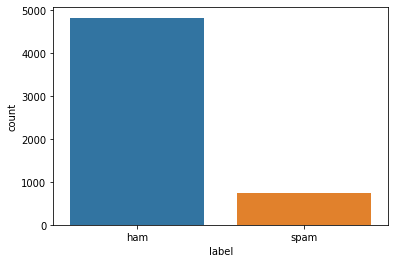

In [ ]:
sns.countplot(data['label'])
plt.show()

In [ ]:
data['label'] = data['label'].map( {'spam': 1, 'ham': 0} )

In [ ]:
data_ham  = data[data['label'] == 0].copy()
data_spam = data[data['label'] == 1].copy()
print(data_ham)

      label                                               text
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...
6         0  Even my brother is not like to speak with me. ...
...     ...                                                ...
5565      0                                       Huh y lei...
5568      0              Will Ì_ b going to esplanade fr home?
5569      0  Pity, * was in mood for that. So...any other s...
5570      0  The guy did some bitching but I acted like i'd...
5571      0                         Rofl. Its true to its name

[4825 rows x 2 columns]


In [ ]:
def show_wordcloud(df, title):
    text = ' '.join(df['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

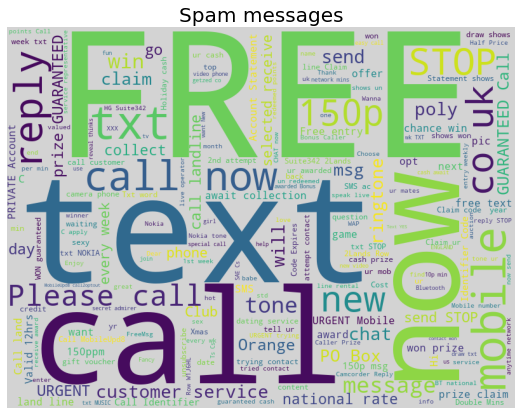

In [ ]:
show_wordcloud(data_spam, "Spam messages")

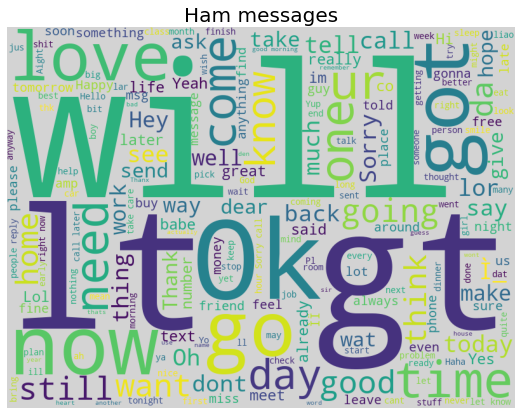

In [ ]:
show_wordcloud(data_ham, "Ham messages")

In [ ]:
# helps in text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# helps in model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

# split data into train and test set
from sklearn.model_selection import train_test_split

In [ ]:
import re
import string
from gensim.models import Word2Vec
from gensim.test.utils import get_tmpfile
X_t = [ ]
tab = [ ]
tableau = []
X = data['text'].values
for e in X:
  #" ".join("".join([" " if ch in string.punctuation else ch for ch in e]).split())
  tab.append((e.translate(str.maketrans('', '', string.punctuation))).split(' ')) 
  for a in tab:
    tableau.append(a)
model = Word2Vec(tab,window=7, size=100,min_count=1, workers=4)
fname = get_tmpfile("/content/drive/MyDrive/spam/vectors.kv")
model.wv.save(fname)
l = model.wv.most_similar(positive=['if'], topn=5)
print(l)
print(model.wv['if'])
print("cv_to_matrix model saved")



[('it', 0.9999526739120483), ('do', 0.9999496936798096), ('me', 0.9999492764472961), ('can', 0.9999460577964783), ('get', 0.9999409914016724)]
[-0.5271576  -0.8881939  -0.48941842 -0.00319259 -0.33813748  0.69622874
  0.88524896  0.31836453  0.08813782  0.20031416  0.42914313  0.16435382
 -0.761057    0.4558783  -0.36988878 -0.4536284  -0.8634479  -0.33527118
  0.09258853 -0.07076388 -0.5936261  -0.22170588 -0.48857504  0.7511176
  0.11616307 -0.73537356 -0.0648942  -0.7018877   0.28953627 -1.4344034
  0.19217505  0.44079304  1.2317711  -0.11913224  0.43832707  1.3022547
  0.55076176  0.91744685 -0.66261464 -0.05157739 -0.36924782  0.22470737
  1.3515232   0.77150416  0.03736147  0.01678332  1.1654445  -0.03645655
 -0.46626183  1.3129302  -0.04351321 -1.195405    1.02002    -0.7120792
  0.96464866  0.41655403 -0.3667469  -0.29846168  1.1613498  -0.54125005
 -0.94443876  0.4893578   0.37263855  0.9624573  -0.74901223  1.4403479
  0.24702282 -1.2176583   1.0720402   1.1212322  -0.1129956

In [ ]:
a =[]
b = []
longueur_tab = 175
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors
wv = KeyedVectors.load("/content/drive/MyDrive/spam/vectors.kv", mmap='r')
for word_a_traiter in tab:
	print(wv[word_a_traiter])


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  -2.98159127e-03 -2.48910990e-02  3.27413902e-02 -2.72988668e-03
   8.72562453e-03 -1.21446243e-02  4.75158077e-03 -4.87780012e-03
   1.01431962e-02 -2.49617472e-02 -2.69831177e-02  2.55871210e-02
  -2.62742452e-02 -8.65316391e-03  2.61072945e-02 -1.08972890e-02
   7.75031699e-03 -3.55980583e-02 -1.62256777e-03 -1.61753483e-02
  -1.55972661e-02  2.32210057e-03 -1.42414719e-02  5.48485341e-03]
 [-1.08461738e-01 -1.92554668e-01 -1.09855175e-01 -2.82454654e-04
  -6.87345117e-02  1.57242566e-01  1.87396780e-01  6.96838945e-02
   1.42801329e-02  4.24371809e-02  8.16969052e-02  3.28068659e-02
  -1.59673899e-01  9.83481035e-02 -7.35081658e-02 -1.01152450e-01
  -1.84285715e-01 -7.43562505e-02  1.70662180e-02 -1.17934197e-02
  -1.32557586e-01 -5.14013879e-02 -9.90807489e-02  1.64083496e-01
   1.87590476e-02 -1.54829159e-01 -1.57752279e-02 -1.55082464e-01
   6.11893497e-02 -3.09927762e-01  3.71320248e-02  9.41615701e-

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 [-4.2871910e-01 -7.4548882e-01 -4.0383911e-01 ...  7.7427798e-03
  -3.1583062e-01  3.0489298e-02]
 [-2.1178242e-02 -3.5550077e-02 -2.1322956e-02 ... -2.5299357e-03
  -1.2454096e-02  7.2374166e-04]
 ...
 [-2.7221037e-02 -3.6328547e-02 -2.5311192e-02 ...  4.4960068e-03
  -2.0188319e-02  1.0843045e-03]
 [-1.8602726e-01 -3.1325635e-01 -1.6880767e-01 ...  6.2593534e-03
  -1.3368005e-01  8.3731795e-03]
 [-6.1648913e-02 -9.9165760e-02 -5.2614268e-02 ...  6.4052185e-03
  -4.6069559e-02 -4.6483643e-04]]
[[-2.7677250e-01 -4.7350585e-01 -2.6893926e-01 ...  1.5292540e-02
  -2.1432289e-01  2.5250655e-02]
 [-5.1328158e-01 -8.7921810e-01 -4.8339340e-01 ...  2.6930548e-02
  -3.8370132e-01  3.7766706e-02]
 [-6.5465462e-01 -1.1465427e+00 -6.4971399e-01 ...  4.6205152e-02
  -5.1964962e-01  5.0488558e-02]
 ...
 [-6.6625208e-01 -1.1496571e+00 -6.4871663e-01 ...  1.8797984e-02
  -5.0885367e-01  4.0313654e-02]
 [-3.4284241e-02 -6.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  -1.87378198e-01  3.93711507e-01  4.89569634e-01  1.74303919e-01
   3.93031165e-02  1.05216019e-01  2.26122156e-01  7.77162910e-02
  -4.31407362e-01  2.40189642e-01 -2.01345086e-01 -2.37093404e-01
  -4.70937192e-01 -1.80376545e-01  5.48729859e-02 -3.41107361e-02
  -3.28304857e-01 -1.30729184e-01 -2.62787938e-01  4.32840675e-01
   6.27660528e-02 -3.92792135e-01 -3.46009955e-02 -3.94858271e-01
   1.53842434e-01 -7.88545966e-01  9.22116861e-02  2.46151343e-01
   6.97269619e-01 -5.69122955e-02  2.48680383e-01  7.18177140e-01
   3.20439100e-01  5.17129183e-01 -3.59224796e-01 -2.46071611e-02
  -2.13456482e-01  1.19209811e-01  7.44538844e-01  4.43934679e-01
   2.61423662e-02  1.98227037e-02  6.48140311e-01 -1.74598638e-02
  -2.67823160e-01  7.15524316e-01 -1.42585291e-02 -6.64251268e-01
   5.58166802e-01 -3.94111842e-01  5.30152857e-01  2.35601306e-01
  -1.97436750e-01 -1.64120838e-01  6.53440595e-01 -2.92083472e-0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
   1.18643222e-02  5.49618574e-03  2.15831190e-01 -5.60049526e-03
  -8.57563615e-02  2.35485628e-01 -1.87381892e-03 -2.17123598e-01
   1.83156088e-01 -1.33203819e-01  1.78704813e-01  7.79983476e-02
  -6.22424968e-02 -5.29653803e-02  2.14974448e-01 -9.91359204e-02
  -1.74174860e-01  8.79251361e-02  7.06961080e-02  1.81688920e-01
  -1.39011800e-01  2.65305579e-01  4.12805490e-02 -2.22589955e-01
   1.97762251e-01  2.06429094e-01 -2.46995743e-02 -1.21125489e-01
   1.38971964e-02 -2.63518770e-03  1.72098413e-01  3.07607725e-02
  -5.05563691e-02 -1.48624554e-01  2.32211962e-01  1.71490312e-02
   4.50793095e-02 -1.01712249e-01  4.30363677e-02 -1.91648174e-02
   8.56439844e-02 -1.72031298e-01 -2.34363899e-01  2.02518359e-01
  -1.74172059e-01 -7.65469745e-02  2.19913825e-01 -8.08318183e-02
   4.52798121e-02 -2.37023532e-01  6.53011817e-03 -8.02978203e-02
  -8.43147486e-02  7.67032616e-05 -7.01076686e-02  1.33191363e-0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
   1.03685118e-01  1.74573660e-01 -1.15569673e-01 -9.79977660e-03
  -6.92685470e-02  4.25820462e-02  2.51780689e-01  1.47649556e-01
   1.03855124e-02  3.34926299e-05  2.10294724e-01 -8.56612902e-03
  -9.06675532e-02  2.35024408e-01 -7.25385314e-03 -2.12246045e-01
   1.88638508e-01 -1.24112062e-01  1.72452360e-01  8.21798071e-02
  -6.63760751e-02 -4.71641123e-02  2.09723502e-01 -9.69051272e-02
  -1.68924943e-01  9.07214507e-02  7.28064403e-02  1.73744783e-01
  -1.37377977e-01  2.70862073e-01  4.11544815e-02 -2.24080324e-01
   1.96533844e-01  2.05345064e-01 -1.91990919e-02 -1.22604571e-01
   1.91296078e-02 -1.02201933e-02  1.71971515e-01  2.70046741e-02
  -5.25472052e-02 -1.56331822e-01  2.31974721e-01  7.92355184e-03
   5.19889295e-02 -9.67773348e-02  4.32533175e-02 -1.65217072e-02
   8.26721638e-02 -1.72695145e-01 -2.30027884e-01  1.97459772e-01
  -1.74361274e-01 -7.93148503e-02  2.16275603e-01 -7.46330619e-0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
   1.35052367e-03 -2.55983714e-02 -3.67229269e-03 -2.63973251e-02
   9.48402006e-03 -5.68862259e-02  1.10052638e-02  1.18769892e-02
   4.85879667e-02 -2.47823121e-03  1.96999833e-02  4.89889756e-02
   2.43028700e-02  3.48666459e-02 -2.23445687e-02 -5.79329627e-03
  -1.80534162e-02  8.87681358e-03  5.28460518e-02  3.23032960e-02
   1.02489744e-03  4.78580408e-03  3.95215191e-02 -3.69133806e-04
  -1.64904576e-02  5.33003695e-02  1.77715207e-03 -4.31095175e-02
   3.83471027e-02 -2.32704654e-02  3.16204727e-02  1.40859932e-02
  -1.75101794e-02 -6.39703264e-03  4.10602763e-02 -2.19383035e-02
  -3.58621776e-02  1.54304365e-02  1.89601239e-02  3.19995135e-02
  -2.92614773e-02  5.84755875e-02  1.23888114e-02 -4.59263287e-02
   3.77797373e-02  3.77465859e-02  5.23255658e-05 -2.34073643e-02
   3.75648448e-03 -5.53499628e-03  3.85041013e-02  1.56613544e-03
  -1.08259246e-02 -3.50014493e-02  4.80810665e-02  2.35102815e-0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
   8.21934715e-02  1.83373868e-01  4.25120682e-01  1.42173991e-01
  -7.79667497e-01  4.46174055e-01 -3.56712043e-01 -4.48020130e-01
  -8.54404807e-01 -3.36722314e-01  1.06965356e-01 -8.12009126e-02
  -5.90118289e-01 -2.27964982e-01 -4.88305151e-01  7.80636966e-01
   1.12988397e-01 -7.17910886e-01 -6.31443933e-02 -7.19525158e-01
   2.84540951e-01 -1.43997288e+00  1.82168543e-01  4.37661320e-01
   1.26304948e+00 -9.99180377e-02  4.55268145e-01  1.31327176e+00
   5.65980434e-01  9.48540270e-01 -6.51372731e-01 -5.10378405e-02
  -3.71745527e-01  2.21304014e-01  1.36755371e+00  7.95985818e-01
   4.71610390e-02  2.76062805e-02  1.17290795e+00 -2.84928381e-02
  -4.75364894e-01  1.30669224e+00 -3.51758823e-02 -1.21212888e+00
   1.03191197e+00 -7.18455076e-01  9.66086924e-01  4.24782932e-01
  -3.67748797e-01 -2.90262014e-01  1.18448377e+00 -5.42089522e-01
  -9.39596593e-01  4.87786710e-01  3.86469752e-01  9.85506773e-0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[[-3.73987645e-01 -6.57112837e-01 -3.56635362e-01 -3.51522374e-03
  -2.43984208e-01  5.22751391e-01  6.48777068e-01  2.40388200e-01
   5.47647700e-02  1.33147597e-01  2.99647123e-01  1.10643186e-01
  -5.60807109e-01  3.18652064e-01 -2.61343867e-01 -3.20819169e-01
  -6.28151655e-01 -2.38103345e-01  7.03312084e-02 -5.58237731e-02
  -4.26768184e-01 -1.72308698e-01 -3.48538399e-01  5.68843842e-01
   7.57902786e-02 -5.30007601e-01 -4.67025079e-02 -5.19744515e-01
   2.07891539e-01 -1.03858805e+00  1.28723860e-01  3.25476438e-01
   9.12615597e-01 -6.65345863e-02  3.17166060e-01  9.47283626e-01
   4.15735394e-01  6.85348630e-01 -4.81226385e-01 -3.52888964e-02
  -2.72024035e-01  1.62815988e-01  9.87716019e-01  5.80865979e-01
   3.37669849e-02  1.70172080e-02  8.50161195e-01 -2.19140034e-02
  -3.46788138e-01  9.58223641e-01 -2.43808888e-02 -8.77543509e-01
   7.47912765e-01 -5.13853371e-01  6.97582364e-01  3.00780177e-01
  -2.56769031e-01 -2.07496837e-01  8.65287900e-01 -3.99897724e-01
  -6.9250

In [ ]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(X_train)


NameError: ignored

In [ ]:
import re
import string
from glob import glob
import os
from os.path import basename
from pathlib import Path
from os import listdir
from os.path import isfile, join
from gensim.models import Word2Vec
from gensim.test.utils import get_tmpfile

In [ ]:
# integer encode the documents
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
print(encoded_train[0:3])

NameError: ignored

In [ ]:
# pad documents to a max length of 8words
max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
for e in padded_train:
  print(e)

[ 322   10   53   18  299   30  349 1990]
[1992 2558   21    9    4  203 1025  225]
[  83 1443    4  672  350    2 3794 3795]
[ 673    1 1993 3796 3797   40   41 3798]
[3800  862  442 2559  802 2560  545 1028]
[ 406    3  300  675   13  422 1029 3801]
[1994   48 1994  863 3802  262    0    0]
[   8    4  287   35 2562  111  301   53]
[167   1  58   8 500   3 250   0]
[1658  600  288   57   31  864  196  865]
[139 327  20 178 179   0   0   0]
[3804 3805 1998   36 1445 2564 1030 1446]
[ 30 256  75  43 352   0   0   0]
[46  0  0  0  0  0  0  0]
[1031 1999  176   11  636   72   75  340]
[2000  637  501   23  502  212 2001 3808]
[3816  520  366 2003  520   74   62 1255]
[ 56 168 548  16  10 323   0   0]
[2568   14  148   36  150   18    5  128]
[  35 1259  166  156  145   30  266 1032]
[   7   11 2571   35 3818   53    5 3819]
[   2   47 1665  156 2005   50   85    6]
[ 181   27 3820 1666  408   42    9 2006]
[2007  406   32   13  711  195    2 2572]
[101 107   1 159 328 329   0   0]
[  57 

In [ ]:
vocab_size = len(t.word_index) + 1

# define the model
model = Sequential()
model.add(Embedding(vocab_size, 24, input_length=max_length))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

NameError: ignored

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model
model.fit(x=padded_train,
         y=y_train,
         epochs=50,
         validation_data=(padded_test, y_test), verbose=1,
         callbacks=[early_stop]
         )

AttributeError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [ ]:
preds = (model.predict(padded_test) > 0.5).astype("int32")

In [ ]:
c_report(y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.86      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy : 0.97847533632287


0.97847533632287

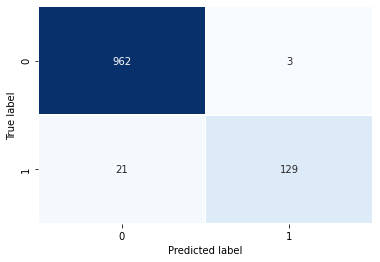

In [ ]:
plot_confusion_matrix(y_test, preds)

In [ ]:
model.save("/content/drive/MyDrive/spam/spam_model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/spam/spam_model/assets


In [ ]:
with open('/content/drive/MyDrive/spam/spam_model/assets/tokenizer.pkl', 'wb') as output:
   pickle.dump(t, output, pickle.HIGHEST_PROTOCOL)

In [ ]:
s_model = tf.keras.models.load_model("spam_model")
with open('/content/drive/MyDrive/spam/spam_model/assets/tokenizer.pkl', 'rb') as input:
    tokenizer = pickle.load(input)
    

In [ ]:
sms = ["We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB "]
sms_proc = tokenizer.texts_to_sequences(sms)
sms_proc = pad_sequences(sms_proc, maxlen=max_length, padding='post')
pred = (model.predict(sms_proc) > 0.5).astype("int32").item()
print(pred)

1
